In [3]:
import numpy as np

import matplotlib.pyplot as plt
import traceback

In [4]:
%matplotlib notebook

In [5]:
def circle(x, y, r, rot, steps=100):
    a = rot + np.linspace(0., 2. * np.pi, steps)
    return np.append((np.cos(a) * r) + x, x), np.append((np.sin(a) * r) + y, y)

In [7]:
class Element:
    
    def __init__(self, rate, edge_radius, path_radius, path_offset, tracers):
        self.centre_x     = 0
        self.centre_y     = 0
        self.path_x       = 0
        self.path_y       = 0
        self.edge_radius  = edge_radius
        self.edge_handle, = plt.plot([],[], '-')
            
        self.path_radius  = path_radius
        self.path_offset  = path_offset
        self.path_handle, = plt.plot([],[], ':')
        
        self.tracers = tracers
        self.tracer_handles = []
        self.tracer_paths   = []
        for colour, fmt, _ in self.tracers:
            hnd, = plt.plot([],[], fmt, color=colour)
            self.tracer_handles += [ hnd ]
            self.tracer_paths   += [ [[], []] ]
        
        self.parent    = None
        self.children  = []
        self.rate      = rate
        self.position  = 0
        self.rotation  = 0
        self.acc_rotation = 0
    
    def step(self, show_elements):
        
        self.rotation += self.rate
        
        if (self.parent is not None): 
            self.acc_rotation = self.rotation + self.parent.acc_rotation
            
            if (self.parent.path_radius <= self.parent.edge_radius):
                offset = self.parent.path_radius - self.edge_radius
                delta  = (self.rate * self.edge_radius) / self.parent.path_radius
            else:
                offset = self.parent.path_radius + self.edge_radius
                delta  = -((self.rate * self.edge_radius) / self.parent.path_radius)
                
            self.position -= delta*2
        
            self.centre_x = self.parent.path_x + np.cos(self.position) * offset
            self.centre_y = self.parent.path_y + np.sin(self.position) * offset
        
        if show_elements:
            self.edge_handle.set_data(*circle(self.centre_x, 
                                              self.centre_y, 
                                              self.edge_radius, 
                                              self.acc_rotation))
        else:
            self.edge_handle.set_data([],[])
        
        self.path_x = self.centre_x + np.cos(self.acc_rotation) * self.path_offset
        self.path_y = self.centre_y + np.sin(self.acc_rotation) * self.path_offset
        
        if show_elements:
            self.path_handle.set_data(*circle(self.path_x, 
                                              self.path_y, 
                                              self.path_radius, 
                                              self.acc_rotation))
        else:
            self.path_handle.set_data([],[])
        
        for hnd, path, (_, _, offset) in zip(self.tracer_handles, 
                                                    self.tracer_paths, 
                                                    self.tracers):
            
            path[0] += [ self.path_x + np.cos(self.acc_rotation) * offset ]
            path[1] += [ self.path_y + np.sin(self.acc_rotation) * offset ]
            hnd.set_data(*path)
            
        for child in self.children:
            child.step(show_elements)
            
    def add(self, element):
        self.children += [ element ]
        self.children[-1].parent = self

In [8]:
class UI:
    def __init__(self):
        
        self.show_elements = True
        figw, figh, figdpi = 400, 400, 50
        self.figure = plt.figure(facecolor='w', figsize=(figw/figdpi, figh/figdpi), dpi=figdpi)
        self.axis   = plt.gca()
        plt.axis('off')
        plt.xlim([-1,1])
        plt.ylim([-1,1])
        
        radius = 0.45
        num_pens = 10
        cmap = [plt.get_cmap('RdBu')(int(idx)) 
                for idx in np.linspace(64, 256-64, num_pens)]
        
        pens = [(colour, '-', radius-delta) 
                for colour, delta in zip(cmap, np.linspace(0.1,0.3,num_pens))]
                
        elem_0            = Element(0.05, radius, radius, 0.0, pens)
        self.root_element = Element(0.0, 1.0, 1.0, 0.0, [])
        self.root_element.add(elem_0)
        
        plt.show()
    
    def on_click(self, event):
        if not (event.inaxes == self.axis): return
        plt.sca(self.axis)
        
        try:
            self.show_elements = not self.show_elements
            self.root_element.step(self.show_elements)      
        except Exception:
            plt.title(traceback.format_exc())
        
    def on_move(self, event):
        if not (event.inaxes == self.axis): return
        plt.sca(self.axis)
        
        try:
            self.root_element.step(self.show_elements)      
        except Exception:
            plt.title(traceback.format_exc())
        
    def attach(self, key, func):
        self.figure.canvas.mpl_connect(key, func)

<IPython.core.display.Javascript object>


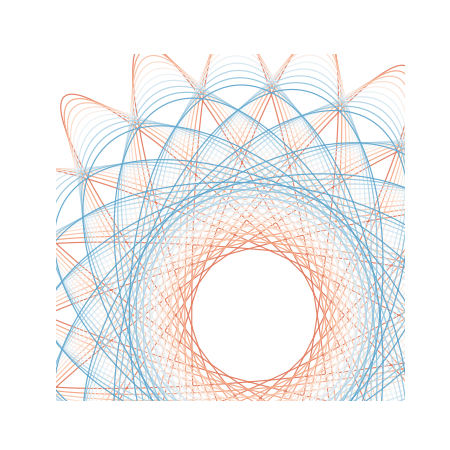

In [9]:
ui = UI()

def on_click(event):
    global ui
    ui.on_click(event)
    
def on_move(event):
    global ui
    ui.on_move(event)
    
ui.attach('button_press_event',  on_click)
ui.attach('motion_notify_event', on_move)

# Beispiel 2

### Fractal using Spirograph in Python
#### Introduction

Spirograph is a geometric drawing toy that produces mathematical roulette curves of the variety technically known as hypotrochoids and epitrochoids. It was developed by British engineer Denys Fisher and first sold in 1965.
The name has been a registered trademark of Hasbro Inc. since 1998 following purchase of the company that had acquired the Denys Fisher company. The Spirograph brand was relaunched worldwide with original product configurations in 2013 by Kahootz Toys.

Spirograph can be used to draw various fractals. Some of them are given below

You can visit benice-equation-blogspot.in for more fractals design with there parametric equation. Some of them are given below

#### Mathematics behind the curtain



These are the two parametric equation to form a spirograph fractals, to understand these equations you have to consider a generalized figure of spirograph.

![](spirograph.png)

#### Spirograph-Diagram

For the mathematics part you can refer to Wiki although i’ll try to explain a little of that mathematics in a short here. If we are interested behind the maths then you can check out the referred links. So as of now, these various curve can be drawn by using a parametric equation and varying some values of that equation we can get different fractals. So here’s the parametric equation:

  x(t) = R[(1-k)cost + lkcos(((1-k)/k)t)],  y(t) = R[(1-k)sint - lksin(((1-k)/k)t). 

where,

   k = r/R  

R is a scaling parameter and does not affect the structure of the Spirograph.

and,



   l = p/r  

So, now let’s try to implement this in code

In [6]:
#importing the required libraries 
import random, argparse 
import math 
import turtle 
from PIL import Image 
from datetime import datetime	 
from fractions import gcd 

In [7]:
# A class that draws a spirograph 
class Spiro: 
    # constructor 
    def __init__(self, xc, yc, col, R, r, l): 

        # create own turtle 
        self.t = turtle.Turtle() 
        # set cursor shape 
        self.t.shape('turtle') 
        # set step in degrees 
        self.step = 5
        # set drawing complete flag 
        self.drawingComplete = False

        # set parameters 
        self.setparams(xc, yc, col, R, r, l) 

        # initiatize drawing 
        self.restart() 

    # set parameters 
    def setparams(self, xc, yc, col, R, r, l): 
        # spirograph parameters 
        self.xc = xc 
        self.yc = yc 
        self.R = int(R) 
        self.r = int(r) 
        self.l = l 
        self.col = col 
        # reduce r/R to smallest form by dividing with GCD 
        gcdVal = gcd(self.r, self.R) 
        self.nRot = self.r//gcdVal 
        # get ratio of radii 
        self.k = r/float(R) 
        # set color 
        self.t.color(*col) 
        # current angle 
        self.a = 0

    # restart drawing 
    def restart(self): 
        # set flag 
        self.drawingComplete = False
        # show turtle 
        self.t.showturtle() 
        # go to first point 
        self.t.up() 
        R, k, l = self.R, self.k, self.l 
        a = 0.0
        x = R*((1-k)*math.cos(a) + l*k*math.cos((1-k)*a/k)) 
        y = R*((1-k)*math.sin(a) - l*k*math.sin((1-k)*a/k)) 
        self.t.setpos(self.xc + x, self.yc + y) 
        self.t.down() 

    # draw the whole thing 
    def draw(self): 
        # draw rest of points 
        R, k, l = self.R, self.k, self.l 
        for i in range(0, 360*self.nRot + 1, self.step): 
            a = math.radians(i) 
            x = R*((1-k)*math.cos(a) + l*k*math.cos((1-k)*a/k)) 
            y = R*((1-k)*math.sin(a) - l*k*math.sin((1-k)*a/k)) 
            self.t.setpos(self.xc + x, self.yc + y) 
        # done - hide turtle 
        self.t.hideturtle() 

    # update by one step 
    def update(self): 
        # skip if done 
        if self.drawingComplete: 
            return
        # increment angle 
        self.a += self.step 
        # draw step 
        R, k, l = self.R, self.k, self.l 
        # set angle 
        a = math.radians(self.a) 
        x = self.R*((1-k)*math.cos(a) + l*k*math.cos((1-k)*a/k)) 
        y = self.R*((1-k)*math.sin(a) - l*k*math.sin((1-k)*a/k)) 
        self.t.setpos(self.xc + x, self.yc + y) 
        # check if drawing is complete and set flag 
        if self.a >= 360*self.nRot: 
            self.drawingComplete = True
            # done - hide turtle 
            self.t.hideturtle() 

    # clear everything 
    def clear(self): 
        self.t.clear() 

In [ ]:
# A class for animating spirographs 
class SpiroAnimator: 
    # constructor 
    def __init__(self, N): 
        # timer value in milliseconds 
        self.deltaT = 10
        # get window dimensions 
        self.width = turtle.window_width() 
        self.height = turtle.window_height() 
        # create spiro objects 
        self.spiros = [] 
        for i in range(N): 
            # generate random parameters 
            rparams = self.genRandomParams() 
            # set spiro params 
            spiro = Spiro(*rparams) 
            self.spiros.append(spiro) 
        # call timer 
        turtle.ontimer(self.update, self.deltaT) 

    # restart sprio drawing 
    def restart(self): 
        for spiro in self.spiros: 
            # clear 
            spiro.clear() 
            # generate random parameters 
            rparams = self.genRandomParams() 
            # set spiro params 
            spiro.setparams(*rparams) 
            # restart drawing 
            spiro.restart() 

    # generate random parameters 
    def genRandomParams(self): 
        width, height = self.width, self.height 
        R = random.randint(50, min(width, height)//2) 
        r = random.randint(10, 9*R//10) 
        l = random.uniform(0.1, 0.9) 
        xc = random.randint(-width//2, width//2) 
        yc = random.randint(-height//2, height//2) 
        col = (random.random(), 
            random.random(), 
            random.random()) 
        return (xc, yc, col, R, r, l) 

    def update(self): 
        # update all spiros 
        nComplete = 0
        for spiro in self.spiros: 
            # update 
            spiro.update() 
            # count completed ones 
            if spiro.drawingComplete: 
                nComplete+= 1
        # if all spiros are complete, restart 
        if nComplete == len(self.spiros): 
            self.restart() 
        # call timer 
        turtle.ontimer(self.update, self.deltaT) 

    # toggle turtle on/off 
    def toggleTurtles(self): 
        for spiro in self.spiros: 
            if spiro.t.isvisible(): 
                spiro.t.hideturtle() 
            else: 
                spiro.t.showturtle() 

# save spiros to image 
def saveDrawing(): 
    # hide turtle 
    turtle.hideturtle() 
    # generate unique file name 
    dateStr = (datetime.now()).strftime("%d%b%Y-%H%M%S") 
    fileName = 'spiro-' + dateStr 
    print('saving drawing to %s.eps/png' % fileName) 
    # get tkinter canvas 
    canvas = turtle.getcanvas() 
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 
    # show turtle 
    turtle.showturtle() 

In [8]:
# main() function 
def main(): 
    # use sys.argv if needed 
    print('generating spirograph...') 
    # create parser 
    descStr = """This program draws spirographs using the Turtle module. 
    When run with no arguments, this program draws random spirographs. 

    Terminology: 

    R: radius of outer circle. 
    r: radius of inner circle. 
    l: ratio of hole distance to r. 
    """

    # set to 80% screen width 
    turtle.setup(width=0.8) 

    # set cursor shape 
    turtle.shape('turtle') 

    # set title 
    turtle.title("Spirographs!") 
    
    # add key handler for saving images 
    turtle.onkey(saveDrawing, "s") 
    
    # start listening 
    turtle.listen() 

    # hide main turtle cursor 
    turtle.hideturtle() 


    #params = [float(x) for x in args.sparams] 
    # draw spirograph with given parameters 
    # black by default 
    #col = (0.0, 0.0, 0.0) 
    #spiro = Spiro(0, 0, col, *params) 
    #spiro.draw() 

    # create animator object 
    spiroAnim = SpiroAnimator(4) 
    # add key handler to toggle turtle cursor 
    turtle.onkey(spiroAnim.toggleTurtles, "t") 
    # add key handler to restart animation 
    turtle.onkey(spiroAnim.restart, "space") 

    # start turtle main loop 
    turtle.mainloop() 

In [9]:
main() 

generating spirograph...


D:\DevApps\Anaconda3\2020.02\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
